In [1]:
using Random: seed!
using Statistics
using Plots
using Distances
using LinearAlgebra

In [2]:
#
# Syntax: x = lsngd(A, b; mu, x0, nIters)
#
# Inputs: A is a m x n matrix
#
# b is a vector of length m
#
# mu is the step size to use, and must satisfy
# 0 < mu <= 1 / sigma_1(A)^2 to guarantee convergence
# where sigma_1(A) is the first (largest) singular value.
# A default value for mu will be explained in Ch.5.
#
# x0 is the initial starting vector (of length n) to use.
# Its default value is all zeros for simplicity.
#
# nIters is the number of iterations to perform (default 200)
#
# Outputs: x is a vector of length n containing the approximate solution
#
# Description: Performs Nesterov-accelerated gradient descent
# to solve the least squares problem
# \argmin_x \| b - A x \|_2
#
function lsngd(A, b; x0 = zeros(size(A,2)), nIters = 200, mu = 0)
    
    t_next = 0
    x_current = x0
    x_next = x0
    for i in 1:nIters

        t_current = t_next
        t_next = 0.5 * (1 + sqrt(1 + 4 * t_current^2))
         
        z = x_next + ( ((t_current - 1) / t_next) * (x_next - x_current) )

        x_current = x_next
        x_next = z - mu * (A' * (A * z - b))
    end
    return x_next
end

lsngd (generic function with 1 method)

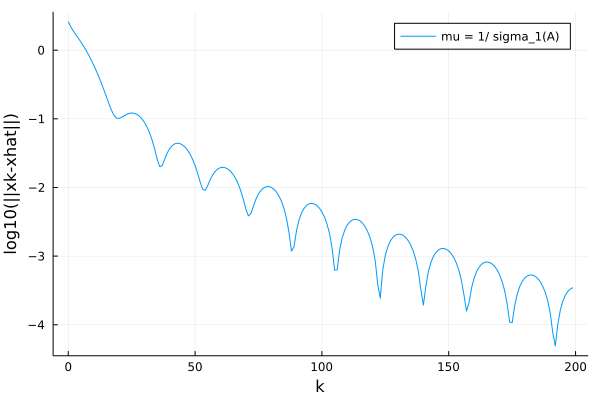

In [9]:
using Random: seed!
m = 100; n = 50; sigma = 0.1;
seed!(0); A = randn(m, n); xtrue = rand(n);
b = A * xtrue + sigma * randn(m);

_,s,_=svd(A)
sigma1=1/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsngd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="mu = 1/ sigma_1(A)")
#plot!(k,A2*x2h,label="p2(t)")

In [5]:
function lsgd(A, b ; mu::Real=0, x0=zeros(size(A,2)), nIters::Int=200)
    x_next= zeros(size(A,2))
    x_current = x0
    for i in 1:nIters 
        x_next = x_current - mu * A' * (A * x_current - b)
        x_current = x_next
    end 
    return x_next
end 

lsgd (generic function with 1 method)

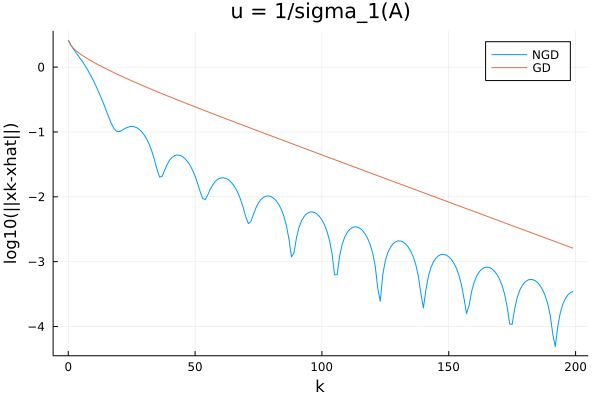

In [12]:
#####part c 

using Random: seed!
m = 100; n = 50; sigma = 0.1;
seed!(0); A = randn(m, n); xtrue = rand(n);
b = A * xtrue + sigma * randn(m);

_,s,_=svd(A)
sigma1=1/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsngd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="NGD")

_,s,_=svd(A)
sigma1=1/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsgd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot!(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="GD", title="u = 1/sigma_1(A)")


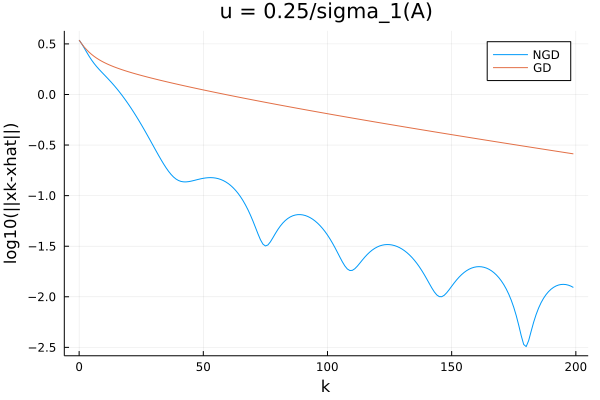

In [13]:
_,s,_=svd(A)
sigma1=0.25/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsngd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="NGD")

_,s,_=svd(A)
sigma1=0.25/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsgd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot!(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="GD", title="u = 0.25/sigma_1(A)")

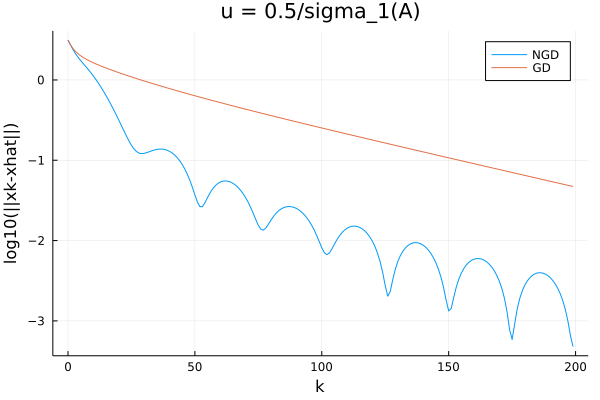

In [14]:
_,s,_=svd(A)
sigma1=0.5/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsngd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="NGD")

_,s,_=svd(A)
sigma1=0.5/(s[1]^2)
#mu=sigma1
k=LinRange(0,199,200)

xhat = A \b
y1=zeros(200)
for i=1:200
    y1[i]=log10(norm(lsgd(A,b,nIters=i,mu=sigma1)-xhat ))
end

plot!(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1, label ="GD", title="u = 0.5/sigma_1(A)")